In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

/opt/homebrew/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_19998/3465571729.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.rea

In [2]:
LSOA2021_shp = gpd.read_file("data/LSOA2021_London_projected.shp")
london_boroughs_shp = gpd.read_file("data/London_Borough_Excluding_MHW.shp")


<AxesSubplot: >

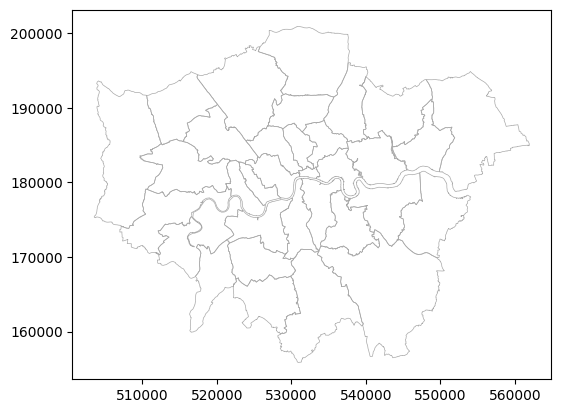

In [3]:
london_boroughs_shp.boundary.plot(color="darkgrey", linewidth=0.5) 

In [4]:
GWR_data = pd.read_csv("data/gwr_gen_overlap.csv")

In [5]:
GWR_data

,OBJECTID,FID_gen_lo,LSOA21CD,gen,FID_gwr_ov,Observed,Cond,LocalR2,Predicted,Intercept,...,StdErrC10_,StdErrC11_,StdErrC12_,StdErrC13_,StdErrC14_,StdErrC15_,StdResid,Source_ID,Shape_Leng,Shape_Area
0,1.0,2.0,E01000002,1.0,2.0,0.01,16.20,0.50,0.36,-0.14,...,0.03,0.02,0.03,0.05,0.02,0.02,-1.19,2.0,2486.58,225673.95
1,2.0,3.0,E01000003,1.0,3.0,0.13,17.35,0.51,0.51,-0.14,...,0.03,0.02,0.03,0.05,0.02,0.02,-1.22,3.0,1142.18,57288.38
2,3.0,45.0,E01000051,1.0,45.0,0.09,4.54,0.41,0.65,-0.32,...,0.03,0.02,0.02,0.02,0.03,0.02,-1.84,45.0,1051.08,65636.03
3,4.0,117.0,E01000126,1.0,117.0,0.05,3.94,0.44,-0.11,-0.27,...,0.04,0.03,0.03,0.02,0.03,0.02,0.49,117.0,2139.36,157796.84
4,5.0,141.0,E01000152,1.0,141.0,0.16,3.94,0.43,0.38,-0.26,...,0.04,0.03,0.03,0.02,0.04,0.02,-0.74,141.0,3080.69,182340.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,705.0,4979.0,E01035707,1.0,4979.0,0.15,11.06,0.54,0.50,-0.08,...,0.04,0.02,0.03,0.05,0.03,0.02,-1.13,4979.0,3108.79,207662.80
705,706.0,4985.0,E01035713,1.0,4985.0,0.05,13.97,0.38,0.02,-0.22,...,0.04,0.02,0.03,0.04,0.03,0.01,0.12,4985.0,3315.49,280201.76
706,707.0,4986.0,E01035714,1.0,4986.0,0.14,12.51,0.40,0.28,-0.23,...,0.04,0.02,0.03,0.03,0.04,0.01,-0.44,4986.0,2559.59,178495.98
707,708.0,4990.0,E01035718,1.0,4990.0,0.07,15.61,0.38,0.22,-0.17,...,0.04,0.02,0.03,0.04,0.03,0.01,-0.49,4990.0,10434.46,2673068.10


In [6]:
GWR_data_map = LSOA2021_shp.merge(GWR_data, left_on = "LSOA21CD", right_on="LSOA21CD", how="inner")

In [7]:
len(GWR_data_map)

709

In [8]:
GWR_data_map.head()

,OBJECTID_x,FID_London,FID_1,FID_LSOA_2,LSOA21CD,LSOA21NM,GlobalID,area,LSOA21CD_1,Shape_Leng_x,...,StdErrC10_,StdErrC11_,StdErrC12_,StdErrC13_,StdErrC14_,StdErrC15_,StdResid,Source_ID,Shape_Leng_y,Shape_Area_y
0,2,0,0.0,1,E01000002,City of London 001B,803d239d-6acf-4a5e-9e19-12defca0b849,225674.0,E01000002,2486.578125,...,0.03,0.02,0.03,0.05,0.02,0.02,-1.19,2.0,2486.58,225673.95
1,3,0,0.0,2,E01000003,City of London 001C,8057ee30-736a-43fa-882a-7a3808ba00d8,57288.4,E01000003,1142.183482,...,0.03,0.02,0.03,0.05,0.02,0.02,-1.22,3.0,1142.18,57288.38
2,45,0,0.0,44,E01000051,Barking and Dagenham 021D,70201789-7bdb-4bc4-a11f-aaa4672aa0c5,65636.0,E01000051,1051.076396,...,0.03,0.02,0.02,0.02,0.03,0.02,-1.84,45.0,1051.08,65636.03
3,117,0,0.0,116,E01000126,Barnet 026A,b125f25c-b108-4682-aea6-07a0f3943070,157797.0,E01000126,2139.358359,...,0.04,0.03,0.03,0.02,0.03,0.02,0.49,117.0,2139.36,157796.84
4,141,0,0.0,140,E01000152,Barnet 026C,37d2fcd6-e56c-404c-a053-63b132f870e0,182341.0,E01000152,3080.688302,...,0.04,0.03,0.03,0.02,0.04,0.02,-0.74,141.0,3080.69,182340.73


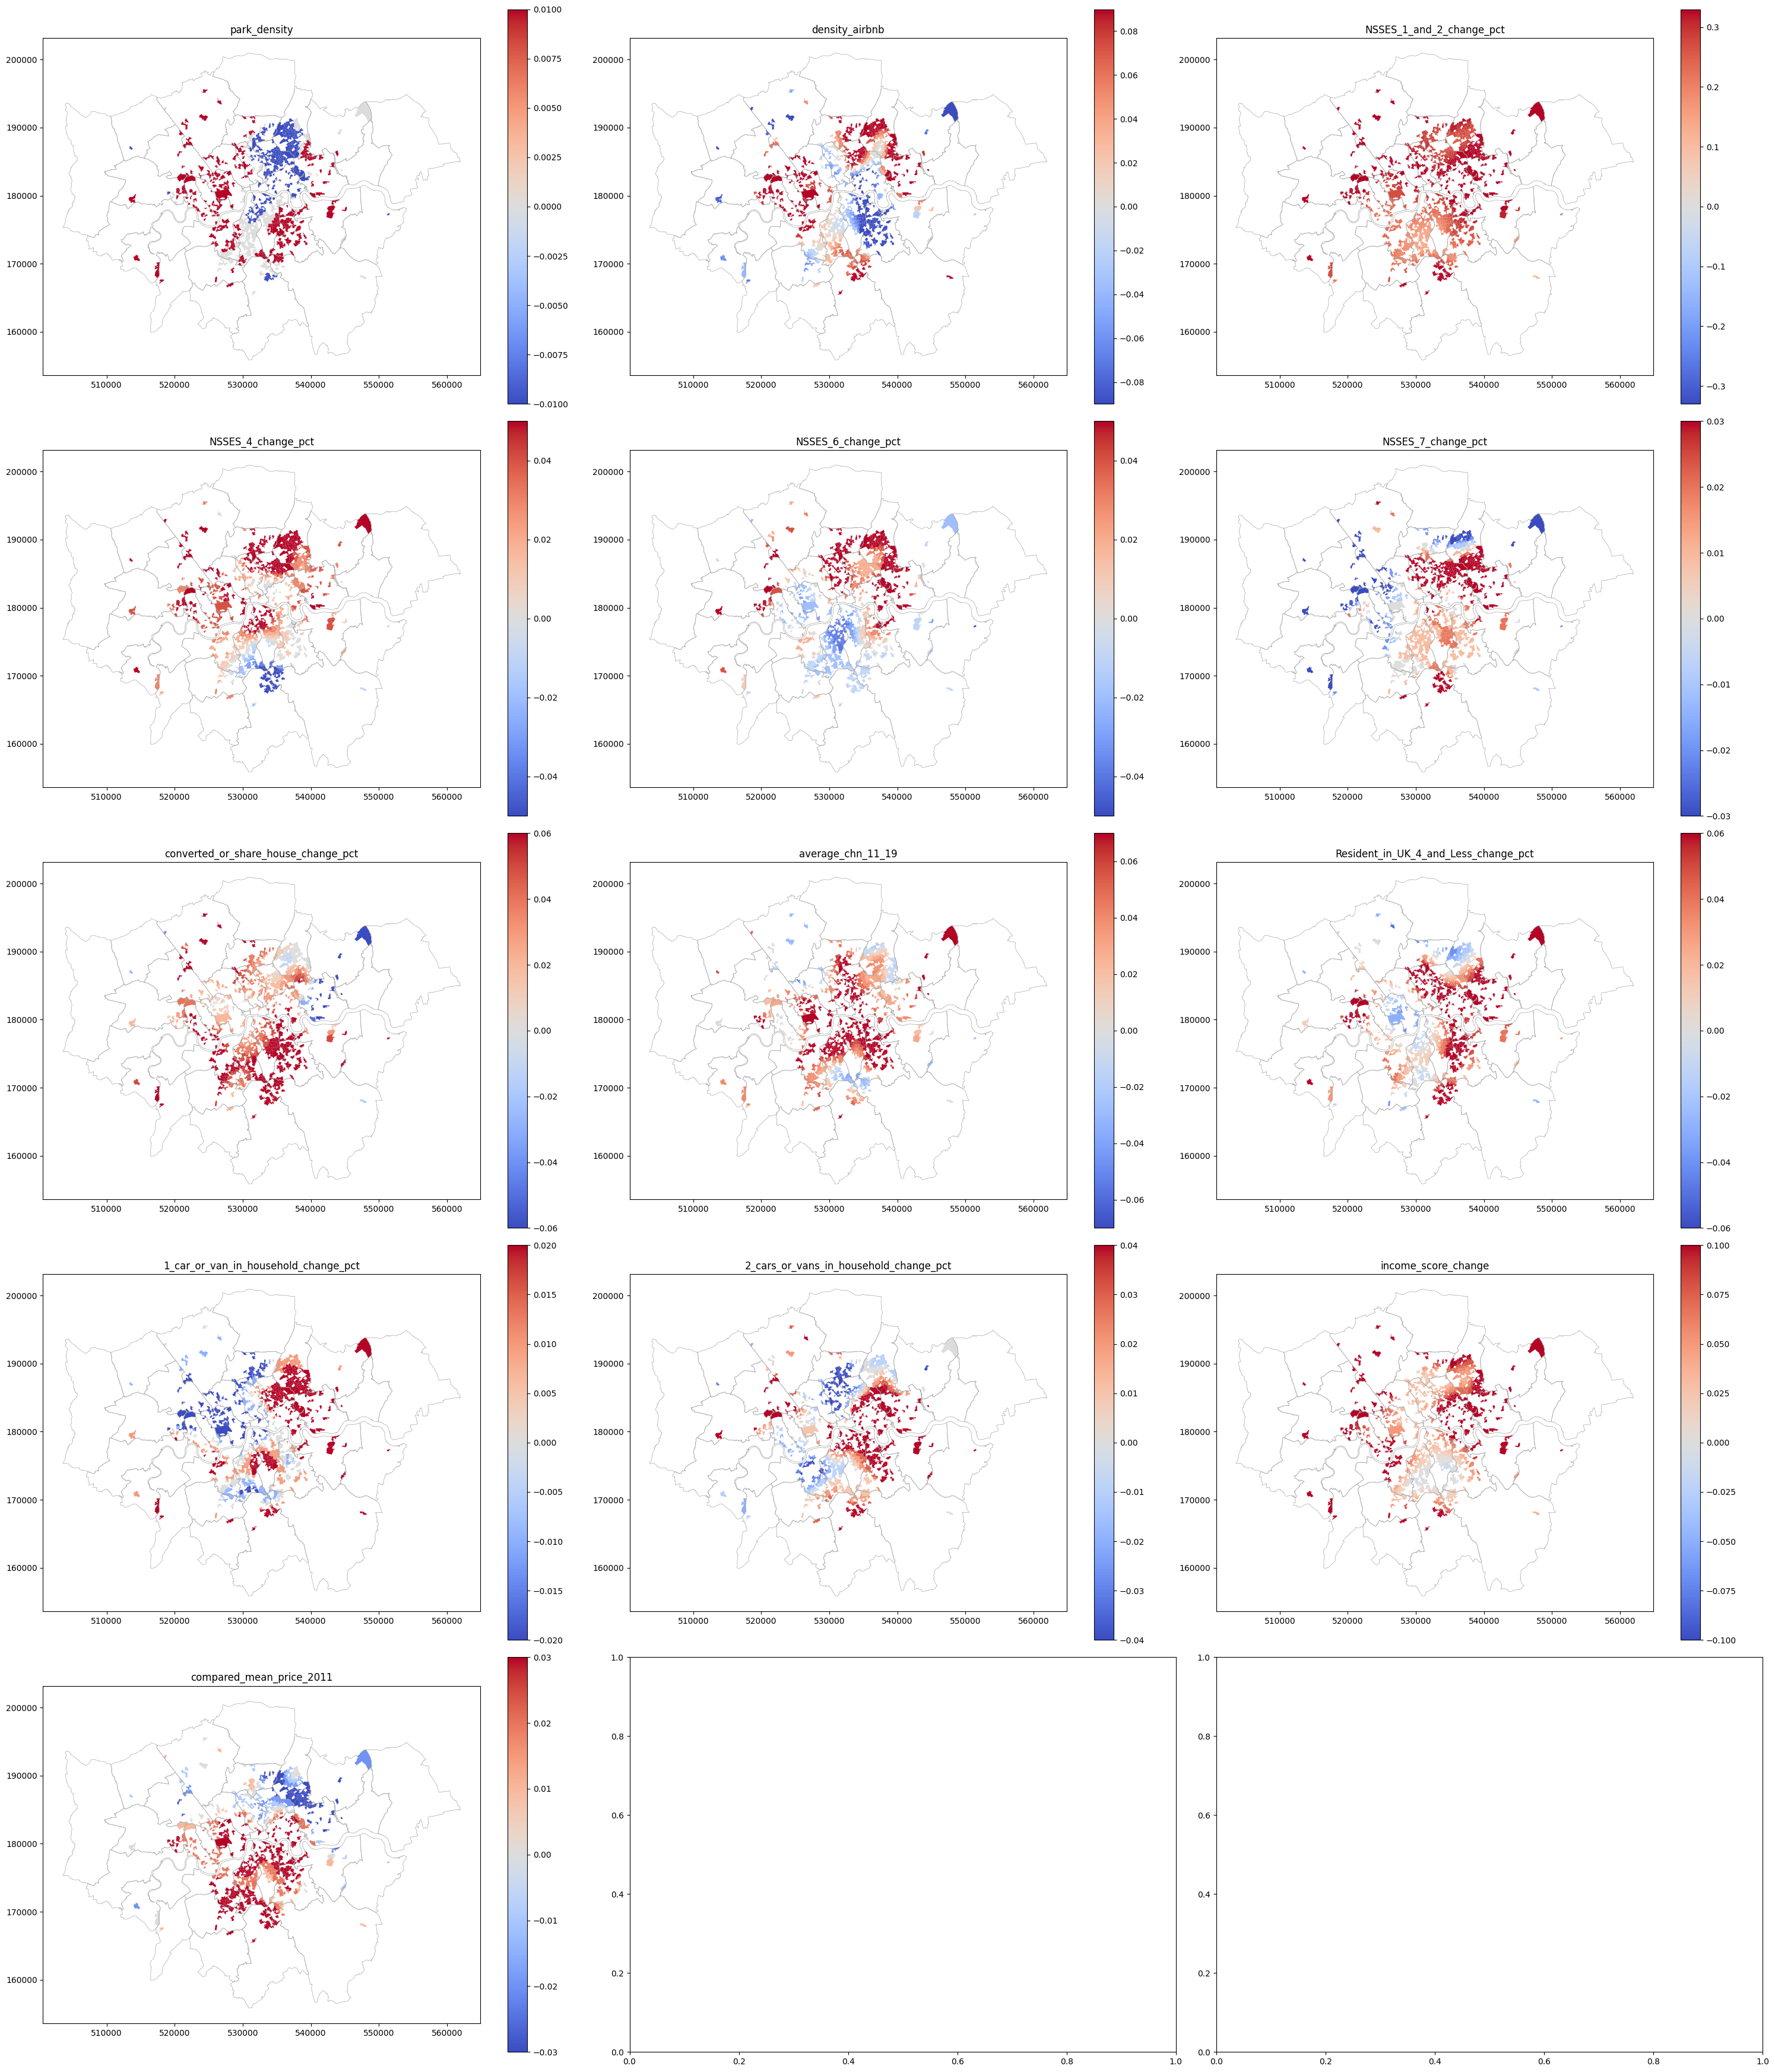

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

# 1. Load data
gdf = GWR_data_map  # Change this to your data path

# 2. Create subplots
fig, axes = plt.subplots(5, 3, figsize=(30, 35))  

factors =  ["park_density","density_airbnb","NSSES_1_and_2_change_pct",\
                     "NSSES_4_change_pct","NSSES_6_change_pct",'NSSES_7_change_pct',\
                    "converted_or_share_house_change_pct","average_chn_11_19","Resident_in_UK_4_and_Less_change_pct",\
                    "1_car_or_van_in_household_change_pct","2_cars_or_vans_in_household_change_pct",'income_score_change',\
                    "compared_mean_price_2011"]#13

for factor, ax in zip(factors, axes.flatten()):
    vmax = max(gdf[factor].quantile(0.75), 0.01)
    # 绘制边界
    london_boroughs_shp.boundary.plot(ax=ax, color="darkgrey", linewidth=0.5)  
          
    norm = TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)
    gdf.plot(column=factor, ax=ax, legend=True, cmap="coolwarm", norm=norm)
    # predicted_cut_overlap.plot(ax=ax, color='orange', alpha=0.3)
    ax.set_title(factor)

plt.tight_layout()
plt.show()
